In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import datetime
import math
#jupyter notebook --notebook-dir=C:\xampp\htdocs\NEUROTRON

![](plots/plot1741576899.svg)

In [3]:
# Get the list of all files and directories
path = "C://xampp//htdocs//NEUROTRON//plots"
dir_list = os.listdir(path)
dir_list

['plot1741576899.svg',
 'plot1741576906.svg',
 'plot1741576961.svg',
 'plot1741576968.svg',
 'plot1741576974.svg',
 'plot1741657128.svg',
 'plot1741657132.svg',
 'plot1741657135.svg',
 'plot1741657159.svg',
 'plot1741657571.svg',
 'plot1741657599.svg',
 'plot1741660112.svg',
 'plot1741660122.svg',
 'plot1741660177.svg',
 'plot1741660194.svg']

In [32]:
datalist = []
for filename in dir_list:
    if(filename[-4:] == '.svg'):
        file = open('plots//' + filename, "r")
        rawdata = file.read()
        file.close()
        y = json.loads(rawdata.split("<json>")[1].split("</json>")[0])
        datalist.append(y)


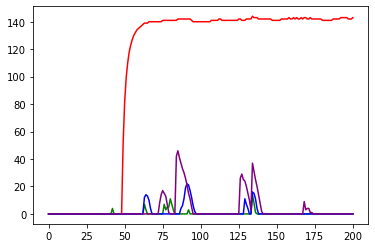

In [48]:
plt.plot(datalist[0]["p1"],color="red")
plt.plot(datalist[0]["p2"],color="green")
plt.plot(datalist[0]["p3"],color="blue")
plt.plot(datalist[0]["p4"],color="purple")


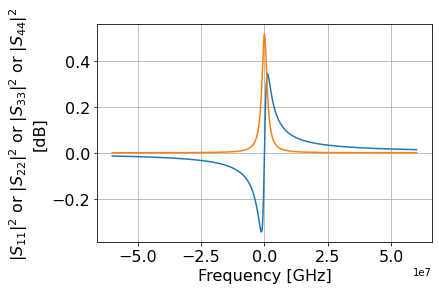

In [24]:
f = 6.83e9
Gamma1 = 8.2e6
Gamma2 = 5.7e6
h = 6.63e-34
p2omega2 = 2*Gamma1/(h*f)
deltaf = np.linspace(-60e6,60e6, num=1000)
deltaomega =2*np.pi*deltaf


powerdbm = -140
powerwatts = 1e-3*10**(powerdbm/10)
omegasquared = p2omega2*powerwatts
r0 = 0.92
r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
plt.plot(deltaf,np.imag(r),deltaf,np.real(r))
#plt.legend(['path3','path4','path6','path3','path4','path6'])
plt.grid()
plt.xlabel('Frequency [GHz]', fontsize = 16)
plt.ylabel('$|S_{11}|^2$ or $|S_{22}|^2$ or $|S_{33}|^2$ or $|S_{44}|^2$\n[dB]', fontsize = 16)
#plt.ylim((-70,0))
#plt.xlim((1,8))
#plt.title('path1')
ax = plt.gca()
ax.tick_params(axis='x', labelsize=16)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=16)  # X-axis tick labels


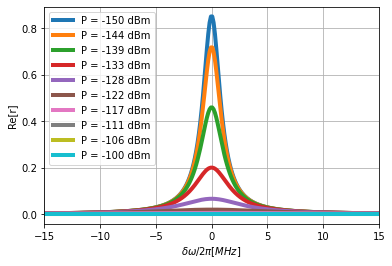

In [25]:
powersweep = np.linspace(-150,-100,10)
legendlist = []
for powerdbm in powersweep:
    powerwatts = 1e-3*10**(powerdbm/10)
    omegasquared = p2omega2*powerwatts
    r0 = 0.92
    r = r0*(1 + 1j*deltaf*2*np.pi/Gamma2)/(1 + (deltaf*2*np.pi/Gamma2)**2 + omegasquared/(Gamma1*Gamma2))
    plt.plot(deltaf/1e6,np.real(r), linewidth=4)
    legendlist.append('P = ' + str(int(np.round(powerdbm))) + " dBm")
    
plt.xlim((-15,15))
plt.legend(legendlist,loc='upper left')
plt.xlabel('$\delta\omega/2\pi [MHz]$')
plt.ylabel('Re[r]')
plt.grid()